pengumpulan pertama hari h uas <br>
bisa diperbaiki sampai presentasi project <br>

presentasi antara 26-30, online, 15 menit udh presentasi sama tanya jawab <br>

nanti ada notebook referensi

pengumpulan pertama hari h uas <br>
bisa diperbaiki sampai presentasi project <br>

presentasi antara 26-30, online, 15 menit udh presentasi sama tanya jawab <br>

nanti ada notebook referensi

# **Permasalahan dan Tujuan Project**

Dataset berisi informasi mengenai identitas dan perilaku pelanggan. Tujuan dari project ini adalah untuk melakuan clustering berdasarkan perilaku pelanggan, kemudian menentukan identitas pelanggan dari cluster-cluster yang terbentuk, serta mencari produk mana saja yang paling banyak dan paling sedikit terjual untuk masing-masing cluster

## **1. DOWNLOAD DATASET**

In [ ]:
import pandas as pd
import numpy as np

!wget https://raw.githubusercontent.com/RafiIndra/Dataset/main/marketing_campaign.csv

--2022-12-28 03:50:37--  https://raw.githubusercontent.com/RafiIndra/Dataset/main/marketing_campaign.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220188 (215K) [text/plain]
Saving to: ‘marketing_campaign.csv.1’

marketing_campaign. 100%[===================>] 215.03K  --.-KB/s    in 0.03s   

2022-12-28 03:50:37 (8.02 MB/s) - ‘marketing_campaign.csv.1’ saved [220188/220188]



## **2. READ AND STORE DATASET**

In [ ]:
df = pd.read_csv("marketing_campaign.csv", sep="	")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### **DATA DICTIONARY**
<table>
  <tr>
    <th>no</th>
    <th>Column</th>
    <th>Types</th>
    <th>Desc</th>
  </tr>
  <tr>
    <td>1</td>
    <td>ID</td>
    <td>int64</td>
    <td>Customer's unique identifier</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Year_Birth</td>
    <td>int64</td>
    <td>Customer's birth year</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Education</td>
    <td>object</td>
    <td>Customer's education level</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Marital_Status</td>
    <td>object</td>
    <td>Customer's marital status</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Income</td>
    <td>float64</td>
    <td>Customer's yearly household income</td>
  </tr>
  <tr>
    <td>6</td>
    <td>Kidhome</td>
    <td>int64</td>
    <td>Number of children in customer's household</td>
  </tr>
  <tr>
    <td>7</td>
    <td>Teenhome</td>
    <td>int64</td>
    <td>Number of teenagers in customer's household</td>
  </tr>
  <tr>
    <td>8</td>
    <td>Dt_Customer</td>
    <td>int64</td>
    <td>Date of customer's enrollment with the company</td>
  </tr>
  <tr>
    <td>9</td>
    <td>Recency</td>
    <td>int64</td>
    <td>Number of days since customer's last purchase</td>
  </tr>
  <tr>
    <td>10</td>
    <td>Complain</td>
    <td>int64</td>
    <td>1 if the customer complained in the last 2 years, 0 otherwise</td>
  </tr>
  <tr>
    <td>11</td>
    <td>MntWines</td>
    <td>int64</td>
    <td>Amount spent on wine in last 2 years</td>
  </tr>
  <tr>
    <td>12</td>
    <td>MntFruits</td>
    <td>int64</td>
    <td>Amount spent on fruit in last 2 years</td>
  </tr>
  <tr>
    <td>13</td>
    <td>MntMeatProducts</td>
    <td>int64</td>
    <td>Amount spent on meat in last 2 years</td>
  </tr>
  <tr>
    <td>14</td>
    <td>MntFishProducts</td>
    <td>int64</td>
    <td>Amount spent on fish in last 2 years</td>
  </tr>
  <tr>
    <td>15</td>
    <td>MntSweetsProducts</td>
    <td>int64</td>
    <td>Amount spent on sweets in last 2 years</td>
  </tr>
  <tr>
    <td>16</td>
    <td>MntGoldProds</td>
    <td>int64</td>
    <td>Amount spent on gold in last 2 years</td>
  </tr>
  <tr>
    <td>17</td>
    <td>AcceptedCmp1</td>
    <td>int64</td>
    <td>1 if customer accepted the offer in the 1st campaign, 0 otherwise</td>
  </tr>
  <tr>
    <td>18</td>
    <td>AcceptedCmp2</td>
    <td>int64</td>
    <td>1 if customer accepted the offer in the 2nd campaign, 0 otherwise</td>
  </tr>
  <tr>
    <td>19</td>
    <td>AcceptedCmp3</td>
    <td>int64</td>
    <td>1 if customer accepted the offer in the 3rd campaign, 0 otherwise</td>
  </tr>
  <tr>
    <td>20</td>
    <td>AcceptedCmp4</td>
    <td>int64</td>
    <td>1 if customer accepted the offer in the 4th campaign, 0 otherwise</td>
  </tr>
  <tr>
    <td>21</td>
    <td>AcceptedCmp5</td>
    <td>int64</td>
    <td>1 if customer accepted the offer in the 5th campaign, 0 otherwise</td>
  </tr>
  <tr>
    <td>22</td>
    <td>Response</td>
    <td>int64</td>
    <td>1 if customer accepted the offer in the last campaign, 0 otherwise</td>
  </tr>
  <tr>
    <td>23</td>
    <td>NumWebPurchases</td>
    <td>int64</td>
    <td>Number of purchases made through the company’s website</td>
  </tr>
  <tr>
    <td>24</td>
    <td>NumCatalogPurchases</td>
    <td>int64</td>
    <td>Number of purchases made using a catalogue</td>
  </tr>
  <tr>
    <td>25</td>
    <td>NumStorePurchases</td>
    <td>int64</td>
    <td>Number of purchases made directly in stores</td>
  </tr>
  <tr>
    <td>26</td>
    <td>NumWebVisitsMonth</td>
    <td>int64</td>
    <td>Number of visits to company’s website in the last month</td>
  </tr>
</table>

## **3. EXPLORATORY DATA ANALYSIS**

<BarContainer object of 5 artists>

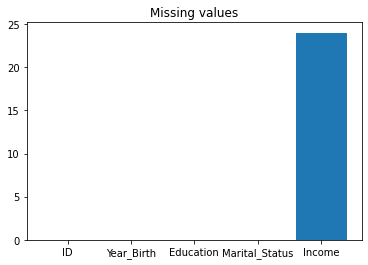

In [ ]:
import matplotlib.pyplot as plt
plt.title("Missing values")
plt.bar(df.columns[0:5], df.iloc[:, 0:5].isna().sum())

Ditemukan bahwa terdapat 24 missing values pada kolom "Income"

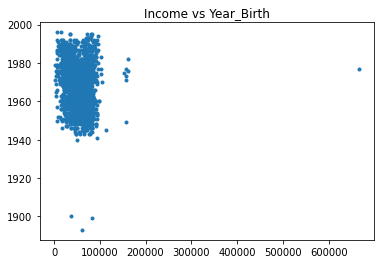

In [ ]:
plt.title("Income vs Year_Birth")
plt.plot(df["Income"], df["Year_Birth"], ".")

dietmukan outlier untuk "Income" > 600000 dan "Year_Birth" < 1920

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


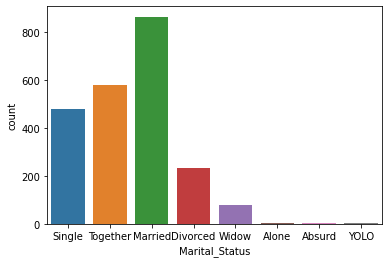

In [ ]:
import seaborn as sns

sns.countplot(df["Marital_Status"])

Ditemukan value yang tidak relevan:<br>
1. "Alone"
2. "Absurd"
3. "Yolo"



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


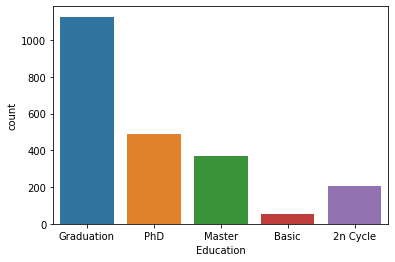

In [ ]:
sns.countplot(df["Education"])

ditemukan values yang tidak relevan:
1. "Basic"
2. "2n Cycle"

## **4. DATA CLEANING**

In [ ]:
df.drop(df[df['Year_Birth'] <= 1900].index, inplace = True)
df["Education"] = df["Education"].replace({"2n Cycle":"Master", "Graduation":"Bachelor", "Basic":"Undergraduate"})
df["Marital_Status"] = df["Marital_Status"].replace({'Together':"Taken", "Divorced":"Single", "Widow":"Single",
                                                     "Alone":"Single", "Absurd":"Single", "YOLO":"Single", "Married":"Taken"})
df = df.dropna()
df = df.drop(columns = ["Z_CostContact", "Z_Revenue"])
df.drop(df[df["Income"] > 600000].index, inplace = True)

df = df.rename(columns = {"MntWines":"Wine", "MntMeatProducts":"Meat", "MntFishProducts":"Fish", "MntSweetProducts":"Sweet",
                          "MntGoldProds":"Gold", "Response":"Campaign6", "AcceptedCmp1":"Campaign1", "AcceptedCmp2":"Campaign2", "AcceptedCmp3":"Campaign3",
                          "AcceptedCmp4":"Campaign4", "AcceptedCmp5":"Campaign5", "MntFruits":"Fruit"})
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wine,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Campaign6
0,5524,1957,Bachelor,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Bachelor,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Bachelor,Taken,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Bachelor,Taken,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Taken,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,Taken,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Taken,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Bachelor,Single,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Taken,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


berdasarkan feature exploration yang telah dilakukan, maka data celaning yang dilakukan adalah sebagai berikut:



*   Remove outlier untuk kolom (["Income"]>600000)
*   Remove outlier untuk kolom (["Year_Birth"] <= 1900)
*   Renaming values untuk kolom ["Education"]
*   Drop missing values yang terdapat pada kolom ["Income"]
*   Renaming values untuk kolom ["Marital_Status"]
*   Drop kolom ["Z_CostContact"] dan ["Z_Revenue"]







# 5. FEATURE ENGINEERING

In [ ]:
df["totalPurchase"] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df["totalSpend"] = df['Wine'] + df['Meat'] + df['Gold'] + df['Sweet'] + df["Fish"] + df["Fruit"]
df["Age"] = 2022 - df["Year_Birth"]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wine,...,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Campaign6,totalPurchase,totalSpend,Age
0,5524,1957,Bachelor,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,1,25,1617,65
1,2174,1954,Bachelor,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,0,6,27,68
2,4141,1965,Bachelor,Taken,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,0,21,776,57
3,6182,1984,Bachelor,Taken,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,0,8,53,38
4,5324,1981,PhD,Taken,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,0,19,422,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,Taken,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,0,18,1341,55
2236,4001,1946,PhD,Taken,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,0,22,444,76
2237,7270,1981,Bachelor,Single,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,0,19,1241,41
2238,8235,1956,Master,Taken,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,0,23,843,66


dibuat kolom baru sebagai berikut:
1. totalPurchase: total berapa kali melakukan pembelian
2. totalSpend: total pengeluaran untuk pembelian
3. age: umur

# **6. BINNING**

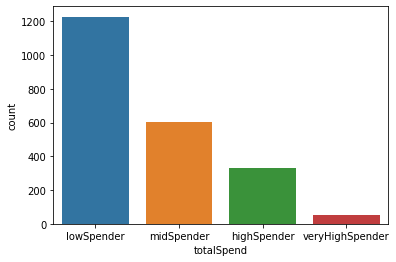

In [ ]:
import seaborn as sns
label = ['lowSpender', "midSpender", "highSpender", "veryHighSpender"]
df['totalSpend'] = pd.cut(df['totalSpend'], [0, 500, 1250, 2000, 3000], labels=label);
sns.countplot(x= df["totalSpend"])

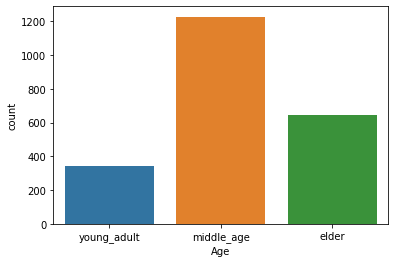

In [ ]:
label = ['young_adult', "middle_age", "elder"]
df['Age'] = pd.cut(df['Age'], [0, 40, 60, 100], labels=label);
sns.countplot(x= df["Age"])

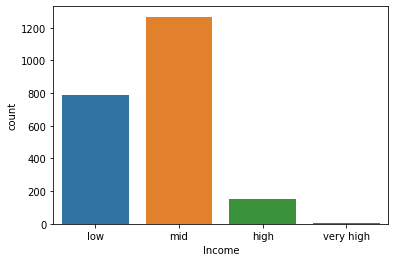

In [ ]:
label = ['low', "mid", "high", "very high"]
df['Income'] = pd.cut(df['Income'], bins=4, labels=label);
sns.countplot(x= df["Income"])

#7. MENGAMBIL KOLOM PERILAKU

In [ ]:
df_behavior = df.iloc[:, 8:-2]
df_behavior

,Recency,Wine,Fruit,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Campaign6,totalPurchase
0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,25
1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,6
2,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,21
3,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,8
4,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,18
2236,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,22
2237,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,19
2238,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,23


#8. METODE USULAN: KMEANS

## Menentukan jumlah cluster dengan Elbow Method

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Knee:  3


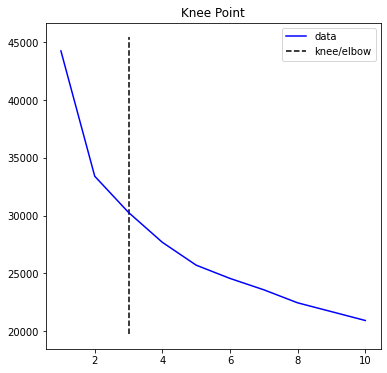

In [ ]:
import matplotlib.pyplot as plt
! pip install kneed
import kneed
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_behavior)

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, init="random", n_init=10, max_iter=300, random_state=42)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

kneedle = kneed.KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
knee_point = kneedle.knee
print('Knee: ', knee_point)
kneedle.plot_knee()

Melakukan clustering dengan metode K-Means membutuhkan inisialisasi jumlah cluster yang ingin dibentuk. Untuk menemukan jumlah cluster yang optimal, salah satu metode yang bisa digunakan adalah dengan menggunakan "Elbow Method". Berdasarkan Elbow Method yang telah dilakukan diatas, maka jumlah cluster yang optimal untuk digunakan adalah sebanyak 3 cluster

## Melakukan clustering K-Means dengan jumlah cluster = 3

In [ ]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)

score_compare = {}
kmeans.fit(scaled_features)
kmeansClusters=kmeans.labels_
score = silhouette_score(scaled_features, kmeansClusters)
score_compare.update({"kmeans": score})
print("shillouette score: ", score)
print("Cluster: ", np.unique(kmeansClusters))

shillouette score:  0.28613872076840513
Cluster:  [0 1 2]


#9. METODE PEMBANDING 1: DBSCAN

DBSCAN atau "Density-based spatial clustering of applications with noise" adalah salah satu metode clustering yang berbasis kerapatan atau *density based*. Metode ini tidak membutuhkan inisialisasi jumlah cluster, hanya membutuhkan inisialisasi "min_pts", yaitu jumlah minimal data didalam sebuah cluster, dan inisialisasi "eps" yaitu jarak maksimal antara titik-titik dalam sebuah cluster.
<br><br>
*rule of thumb* untuk estimasi parameter dalam DBSCAN adalah sebagai berikut:
<br>
1. min_pts gunakan 2(jumlah kolom)
2. eps gunakan jarak antara min_pts

maka, pada percobaan kali ini digunakan 2(20) untuk min_pts

Knee:  2144


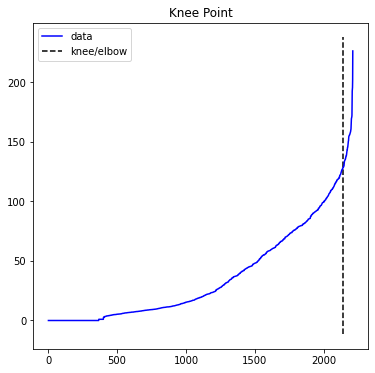

In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neighbors = NearestNeighbors(n_neighbors=40)
neighbors_fit = neighbors.fit(df_behavior)
distances, indices = neighbors_fit.kneighbors(df_behavior)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
kneedle = kneed.KneeLocator(range(1, 2213), distances, curve="convex")
knee_point = kneedle.knee
print('Knee: ', knee_point)
kneedle.plot_knee()

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2144, min_samples=40).fit(df_behavior)
dbscanClusters = dbscan.labels_
score_compare.update({"dbscan": np.nan})
print("Cluster: ", np.unique(dbscanClusters))

Cluster:  [0]


hasil yang ditemukan adalah hanya 1 cluster yang dibentuk oleh DBSCAN. Karena DBSCAN menggunakan kerapatan sebagai dasar dari clustering, maka hasil tersebut menunjukkan bahwa data yang digunakan pada penelitian ini memiliki kerapatan yang tinggi, sehingga DBSCAN tidak dapat menghasilkan performa yang optimal

#10. METODE PEMBANDING 2: AGGLOMERATIVE CLUSTERING



Agglomerative Clustering adalah metode clustering dimana setiap titik merupakan cluster tersendiri, kemudian dilakukan penggabungan atas cluster-cluster yang memiliki kemiripan, sehingga membuat cluster baru yang lebih besar. Metode ini membutuhkan inisialisasi jumlah cluster. Salah satu metode untuk mencari jumlah cluster optimal pada metode ini adalah dengan menggunakan diagram dendogram

## Membuat dendogram

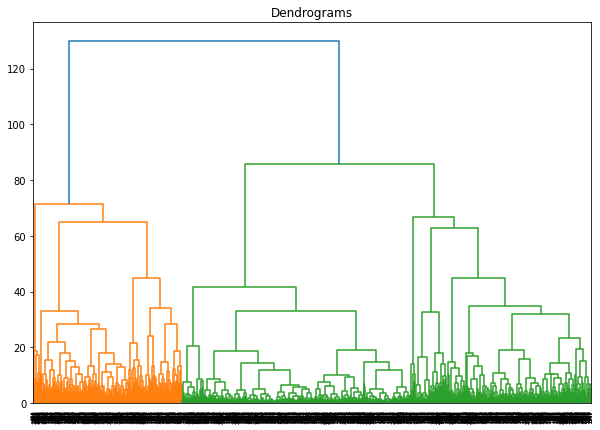

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(scaled_features, method='ward'))

berdasarkan warna pada dendogram (biru, oranye, dan hijau), maka dapat disimpulkan bahwa jumlah cluster optimal untuk dibentuk adalah sebanyak 3 cluster. Kemudian dapat dilakukan clustering menggunakan agglomerative clustering dengan jumlah cluster sebanyak 3

## Melakukan clustering dengan jumlah cluster = 3

In [ ]:
from sklearn.cluster import AgglomerativeClustering
wClusters = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit_predict(scaled_features)
score = silhouette_score(df_behavior, wClusters)
score_compare.update({"Agglomerative": score})
print("shillouette score: ", score)
print("Cluster: ", np.unique(wClusters))

shillouette score:  0.2692888124969939
Cluster:  [0 1 2]


#11. PERBANDINGAN CLUSTERING

<BarContainer object of 3 artists>

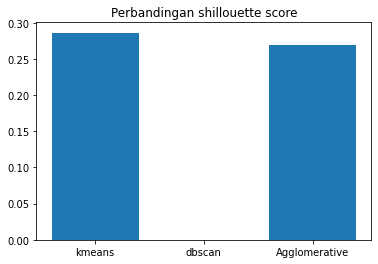

In [ ]:
plt.title("Perbandingan shillouette score")
plt.bar(score_compare.keys(), score_compare.values())

dari ketiga metode yang diteliti, maka perbandingan evaluasi dengan menggunakan shillouette coefficient adalah sebagai berikut:

1.   K-Means: 0.28
2.   DBSCAN: tidak dapat dihitung karena tidak ada cluster yang terbentuk
3.   Agglomerative: 0.26

Shillouette Coefficient memiliki rentang dari -1 sampai dengan 1, dimana semakin besar skornya, maka semakin baik cluster yang terbentuk. Maka, berdasarkan shillouette coefficient yang didapat, K-Means merupakan metode yang terbaik, sehingga untuk tahapan berikutnya, cluster dari metode K-Means lah yang akan dipakai.



## Membuat kolom cluster pada dataframe, dan memasukkan nilai cluster dari K-Means

In [ ]:
df.insert(0, "Cluster", kmeansClusters, True)
df

,Cluster,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Campaign6,totalPurchase,totalSpend,Age
0,2,5524,1957,Bachelor,Single,mid,0,0,04-09-2012,58,...,0,0,0,0,0,0,1,25,highSpender,elder
1,1,2174,1954,Bachelor,Single,mid,1,1,08-03-2014,38,...,0,0,0,0,0,0,0,6,lowSpender,elder
2,2,4141,1965,Bachelor,Taken,mid,0,0,21-08-2013,26,...,0,0,0,0,0,0,0,21,midSpender,middle_age
3,1,6182,1984,Bachelor,Taken,low,1,0,10-02-2014,26,...,0,0,0,0,0,0,0,8,lowSpender,young_adult
4,2,5324,1981,PhD,Taken,mid,1,0,19-01-2014,94,...,0,0,0,0,0,0,0,19,lowSpender,middle_age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,10870,1967,Bachelor,Taken,mid,0,1,13-06-2013,46,...,0,0,0,0,0,0,0,18,highSpender,middle_age
2236,1,4001,1946,PhD,Taken,mid,2,1,10-06-2014,56,...,0,0,0,1,0,0,0,22,lowSpender,elder
2237,2,7270,1981,Bachelor,Single,mid,0,0,25-01-2014,91,...,0,1,0,0,0,0,0,19,midSpender,middle_age
2238,2,8235,1956,Master,Taken,mid,0,1,24-01-2014,8,...,0,0,0,0,0,0,0,23,midSpender,elder


## Melihat distribusi cluster

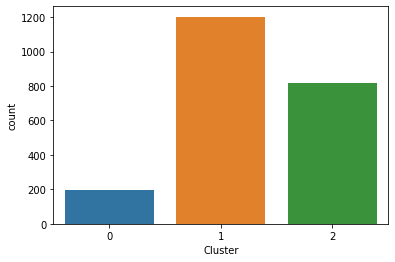

In [ ]:
sns.countplot(x=df["Cluster"])

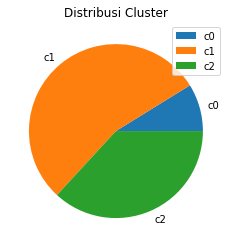

In [ ]:
c0 = df.loc[df["Cluster"]==0].shape[0]
c1 = df.loc[df["Cluster"]==1].shape[0]
c2 = df.loc[df["Cluster"]==2].shape[0]
y = np.array([c0, c1, c2])

plt.title("Distribusi Cluster")
plt.pie(y, labels=["c0", "c1", "c2"])
plt.legend()
plt.show()

In [ ]:
df.loc[df["Cluster"]==0].to_csv("c0.csv")


In [ ]:
df.loc[df["Cluster"]==1].to_csv("c1.csv")
df.loc[df["Cluster"]==2].to_csv("c2.csv")

In [ ]:
c0 = df.loc[df["Cluster"]==0]
c0.head()

,Cluster,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Campaign6,totalPurchase,totalSpend,Age
15,0,2114,1946,PhD,Single,high,0,0,24-11-2012,23,...,0,0,1,1,0,0,1,26,highSpender,elder
29,0,1966,1965,PhD,Taken,high,0,0,22-11-2013,96,...,0,0,1,0,0,0,0,26,highSpender,middle_age
53,0,2225,1977,Bachelor,Single,high,0,0,07-06-2014,54,...,1,0,0,1,0,0,1,21,highSpender,middle_age
55,0,6260,1955,Master,Taken,high,0,0,19-11-2012,55,...,0,0,1,0,0,0,1,27,highSpender,elder
60,0,6853,1982,Master,Single,mid,0,0,04-07-2013,12,...,0,1,1,0,0,0,1,21,highSpender,young_adult


#12. ANALISIS CLUSTER

## Meneliti income setiap cluster

<BarContainer object of 4 artists>

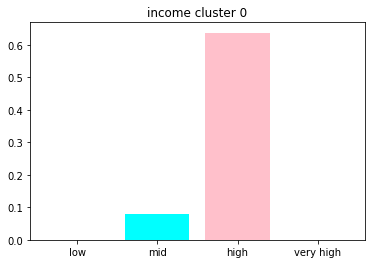

In [ ]:
tes = df.loc[df["Cluster"] == 0]

income = ["low", "mid", "high", "very high"]
percent = []
for i in income:
  percent.append(tes.loc[tes["Income"]== i].shape[0] / df.loc[df["Income"]== i].shape[0])

plt.title("income cluster 0")
plt.bar(income, percent, color=["red", "cyan", "pink", "orange"])

<BarContainer object of 4 artists>

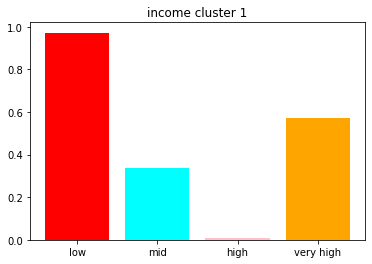

In [ ]:
tes = df.loc[df["Cluster"] == 1]

income = ["low", "mid", "high", "very high"]
percent = []
for i in income:
  percent.append(tes.loc[tes["Income"]== i].shape[0] / df.loc[df["Income"]== i].shape[0])

plt.title("income cluster 1")
plt.bar(income, percent, color=["red", "cyan", "pink", "orange"])

<BarContainer object of 4 artists>

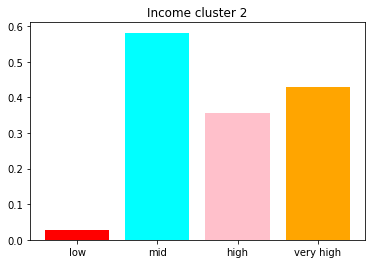

In [ ]:
tes = df.loc[df["Cluster"] == 2]

income = ["low", "mid", "high", "very high"]
percent = []
for i in income:
  percent.append(tes.loc[tes["Income"]== i].shape[0] / df.loc[df["Income"]== i].shape[0])

plt.title("Income cluster 2")
plt.bar(income, percent, color=["red", "cyan", "pink", "orange"])

## Meneliti umur setiap cluster

<BarContainer object of 3 artists>

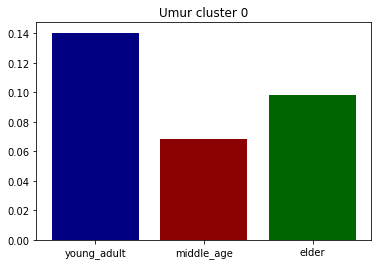

In [ ]:
tes = df.loc[df["Cluster"] == 0]

age = ["young_adult", "middle_age", "elder"]
percent = []
for i in age:
  percent.append(tes.loc[tes["Age"]== i].shape[0] / df.loc[df["Age"]== i].shape[0])

plt.title("Umur cluster 0")
plt.bar(age, percent, color=["navy", "darkRed", "darkGreen", "orange"])

<BarContainer object of 3 artists>

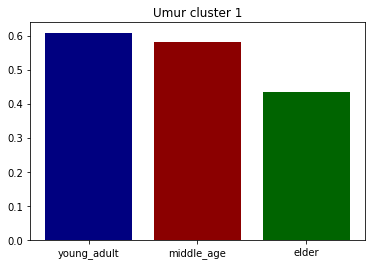

In [ ]:
tes = df.loc[df["Cluster"] == 1]

age = ["young_adult", "middle_age", "elder"]
percent = []
for i in age:
  percent.append(tes.loc[tes["Age"]== i].shape[0] / df.loc[df["Age"]== i].shape[0])

plt.title("Umur cluster 1")
plt.bar(age, percent, color = ["navy", "darkRed", "darkGreen", "orange"])

<BarContainer object of 3 artists>

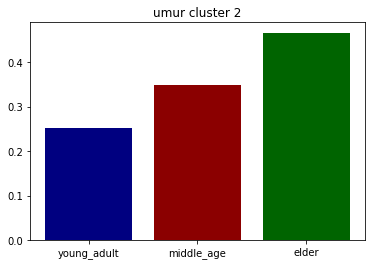

In [ ]:
tes = df.loc[df["Cluster"] == 2]

age = ["young_adult", "middle_age", "elder"]
percent = []
for i in age:
  percent.append(tes.loc[tes["Age"]== i].shape[0] / df.loc[df["Age"]== i].shape[0])

plt.title("umur cluster 2")
plt.bar(age, percent, color = ["navy", "darkRed", "darkGreen", "orange"])

## Meneliti total pengeluaran setiap cluster

<BarContainer object of 4 artists>

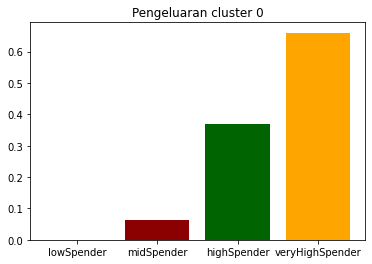

In [ ]:
tes = df.loc[df["Cluster"] == 0]

spend = ["lowSpender", "midSpender", "highSpender", "veryHighSpender"]
percent = []
for i in spend:
  percent.append(tes.loc[tes["totalSpend"]== i].shape[0] / df.loc[df["totalSpend"]== i].shape[0])

plt.title("Pengeluaran cluster 0")
plt.bar(spend, percent, color = ["navy", "darkRed", "darkGreen", "orange"])

<BarContainer object of 4 artists>

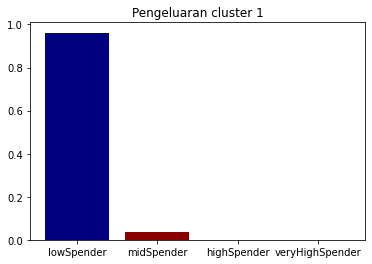

In [ ]:
tes = df.loc[df["Cluster"] == 1]

spend = ["lowSpender", "midSpender", "highSpender", "veryHighSpender"]
percent = []
for i in spend:
  percent.append(tes.loc[tes["totalSpend"]== i].shape[0] / df.loc[df["totalSpend"]== i].shape[0])

plt.title("Pengeluaran cluster 1")
plt.bar(spend, percent, color = ["navy", "darkRed", "darkGreen", "orange"])

<BarContainer object of 4 artists>

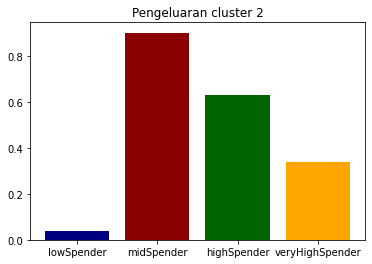

In [ ]:
tes = df.loc[df["Cluster"] == 2]

spend = ["lowSpender", "midSpender", "highSpender", "veryHighSpender"]
percent = []
for i in spend:
  percent.append(tes.loc[tes["totalSpend"]== i].shape[0] / df.loc[df["totalSpend"]== i].shape[0])

plt.title("Pengeluaran cluster 2")
plt.bar(spend, percent, color = ["navy", "darkRed", "darkGreen", "orange"])

#13. KESIMPULAN CLUSTER

Kesimpulan yang didapat dari masing masing cluster adalah sebagai berikut:


1.   CLuster 0: Berisi mayoritas pelanggan dengan pemasukan yang sangat tinggi, serta sebagian dari pelanggan dengan pemasukan menengah-tinggi. Pelanggan pada cluster ini pada umumnya memiliki jumlah belanja yang menengah, dengan umur yang bervariasi

2.   Cluster 1: Pelanggan dengan jumlah belanja yang rendah. Berisi mayoritas pelanggan dengan pemasukkan rendah, dan sebagian kecil dari pelanggan dengan pemasukkan menengah. Tidak rentang umur yang mencolok pada cluster ini.

3. Cluster 2: Pelanggan dengan jumlah belanja yang tinggi-sangat tinggi. Berisi mayoritas pelanggan dengan pemasukkan tinggi, dan sebagian kecil dari pelanggan dengan pemasukkan rendah. Tidak ada rentang umur yang mencolok pada cluster ini



#14. APRIORI METHOD

Apriori adalah

## Binning untuk setiap pembelian produk

untuk setiap produk, dilakukan pengelompokkan menjadi "lowBuyer" yaitu pelanggan dengan jumlah pembelian produk rendah, "mediumBuyer" untuk pelanggan dengan jumlah pembelian produk menengah, dan "highBuyer" untuk pelanggan dengan jumlah pembelian produk tinggi

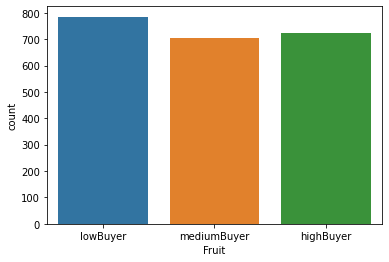

In [ ]:
label = ['lowBuyer', "mediumBuyer", "highBuyer"]
df['Fruit'] = pd.qcut(df['Fruit'], 3, labels=label)
sns.countplot(x= df["Fruit"])

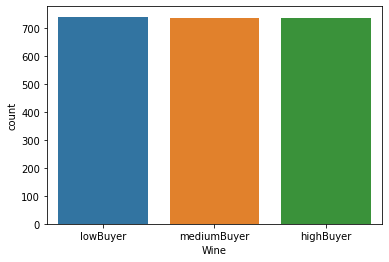

In [ ]:
label = ['lowBuyer', "mediumBuyer", "highBuyer"]
df['Wine'] = pd.qcut(df['Wine'], 3, labels=label);
sns.countplot(x= df["Wine"])

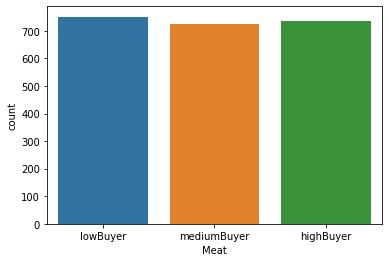

In [ ]:
label = ['lowBuyer', "mediumBuyer", "highBuyer"]
df['Meat'] = pd.qcut(df['Meat'], 3, labels=label);
sns.countplot(x= df["Meat"])

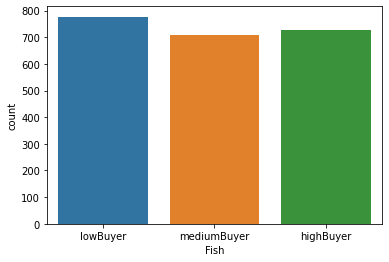

In [ ]:
label = ['lowBuyer', "mediumBuyer", "highBuyer"]
df['Fish'] = pd.qcut(df['Fish'], 3, labels=label);
sns.countplot(x= df["Fish"])

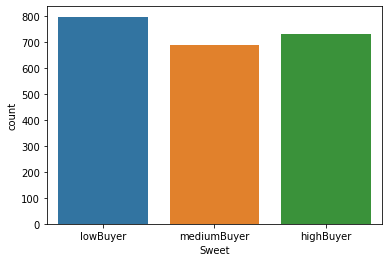

In [ ]:
label = ['lowBuyer', "mediumBuyer", "highBuyer"]
df['Sweet'] = pd.qcut(df['Sweet'], 3, labels=label);
sns.countplot(x= df["Sweet"])

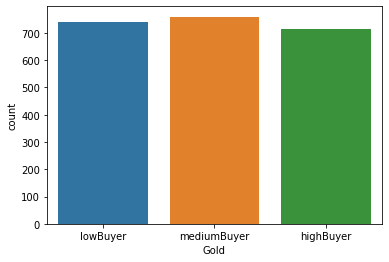

In [ ]:
label = ['lowBuyer', "mediumBuyer", "highBuyer"]
df['Gold'] = pd.qcut(df['Gold'], 3, labels=label);
sns.countplot(x= df["Gold"])

## Memisahkan setiap cluster ke dataframe yang berbeda

In [ ]:
cluster0 = df.loc[df["Cluster"]==0]
cluster1 = df.loc[df["Cluster"]==1]
cluster2 = df.loc[df["Cluster"]==2]

## Mengambil kolom produk

In [ ]:
cluster0 = cluster0.drop(columns = cluster0.columns[0:10])
cluster0 = cluster0.drop(columns=cluster0.columns[6:])
cluster1 = cluster1.drop(columns = cluster1.columns[0:10])
cluster1 = cluster1.drop(columns=cluster1.columns[6:])
cluster2 = cluster2.drop(columns = cluster2.columns[0:10])
cluster2 = cluster2.drop(columns=cluster2.columns[6:])

## APRIORI CLUSTER 0

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

c0_enc = pd.get_dummies(cluster0)
itemset_c0 = apriori(c0_enc, min_support = 0.05, use_colnames = True)
apr_c0 = association_rules(itemset_c0, metric ="lift", min_threshold = 0.5)
apr_c0.sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
248,"(Fish_lowBuyer, Wine_highBuyer)",(Meat_mediumBuyer),0.097436,0.179487,0.051282,0.526316,2.932331,0.033794,1.732194
79,(Sweet_lowBuyer),(Meat_mediumBuyer),0.097436,0.179487,0.051282,0.526316,2.932331,0.033794,1.732194
78,(Meat_mediumBuyer),(Sweet_lowBuyer),0.179487,0.097436,0.051282,0.285714,2.932331,0.033794,1.263590
249,(Meat_mediumBuyer),"(Fish_lowBuyer, Wine_highBuyer)",0.179487,0.097436,0.051282,0.285714,2.932331,0.033794,1.263590
51,(Sweet_lowBuyer),(Fruit_mediumBuyer),0.097436,0.184615,0.051282,0.526316,2.850877,0.033294,1.721368
50,(Fruit_mediumBuyer),(Sweet_lowBuyer),0.184615,0.097436,0.051282,0.277778,2.850877,0.033294,1.249704
75,(Meat_mediumBuyer),(Fish_lowBuyer),0.179487,0.117949,0.056410,0.314286,2.664596,0.035240,1.286325
74,(Fish_lowBuyer),(Meat_mediumBuyer),0.117949,0.179487,0.056410,0.478261,2.664596,0.035240,1.572650
247,"(Wine_highBuyer, Meat_mediumBuyer)",(Fish_lowBuyer),0.169231,0.117949,0.051282,0.303030,2.569170,0.031321,1.265552
250,(Fish_lowBuyer),"(Wine_highBuyer, Meat_mediumBuyer)",0.117949,0.169231,0.051282,0.434783,2.569170,0.031321,1.469822


In [ ]:
prod = apr_c0[apr_c0['antecedents'].astype(str).str.contains("highBuyer", na=False)].sort_values(by='lift', ascending=False)
prod.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
248,"(Fish_lowBuyer, Wine_highBuyer)",(Meat_mediumBuyer),0.097436,0.179487,0.051282,0.526316,2.932331,0.033794,1.732194
247,"(Wine_highBuyer, Meat_mediumBuyer)",(Fish_lowBuyer),0.169231,0.117949,0.051282,0.303030,2.569170,0.031321,1.265552
170,"(Fish_mediumBuyer, Wine_highBuyer)",(Fruit_mediumBuyer),0.143590,0.184615,0.066667,0.464286,2.514881,0.040158,1.522051
385,"(Fruit_mediumBuyer, Meat_highBuyer)",(Fish_mediumBuyer),0.133333,0.153846,0.051282,0.384615,2.500000,0.030769,1.375000
169,"(Fruit_mediumBuyer, Wine_highBuyer)",(Fish_mediumBuyer),0.174359,0.153846,0.066667,0.382353,2.485294,0.039842,1.369963


Berdasarkan metoe apriori, karakteristik yang paling mencolok dari cluster 0 adalah pembelian yang rendah untuk produk ikan dan manisan , jumlah pembelian produk menegah untuk produk daging dan buah-buhan, dan jumlah pembelian produk yang tinggi untuk produk anggur. Sedangkan untuk produk yang paling banyak terjual pada cluster ini adalah produk anggur , yang biasanya dibeli bersamaan dengan ikan, buah-buahan dan daging.

## APRIORI CLUSTER 1

In [ ]:
c1_enc = pd.get_dummies(cluster1)
itemset_c1 = apriori(c1_enc, min_support = 0.05, use_colnames = True)
apr_c1 = association_rules(itemset_c1, metric ="lift", min_threshold = 0.5)
apr_c1.sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2353,"(Sweet_mediumBuyer, Gold_mediumBuyer, Wine_med...","(Fruit_mediumBuyer, Meat_mediumBuyer)",0.080699,0.194676,0.054908,0.680412,3.495110,0.039198,2.519886
2356,"(Fruit_mediumBuyer, Meat_mediumBuyer)","(Sweet_mediumBuyer, Gold_mediumBuyer, Wine_med...",0.194676,0.080699,0.054908,0.282051,3.495110,0.039198,1.280455
2357,"(Sweet_mediumBuyer, Meat_mediumBuyer)","(Fruit_mediumBuyer, Gold_mediumBuyer, Wine_med...",0.196339,0.080699,0.054908,0.279661,3.465490,0.039064,1.276206
2352,"(Fruit_mediumBuyer, Gold_mediumBuyer, Wine_med...","(Sweet_mediumBuyer, Meat_mediumBuyer)",0.080699,0.196339,0.054908,0.680412,3.465490,0.039064,2.514680
2324,"(Fish_mediumBuyer, Sweet_mediumBuyer, Wine_med...","(Fruit_mediumBuyer, Meat_mediumBuyer)",0.084859,0.194676,0.055740,0.656863,3.374141,0.039221,2.346946
2325,"(Fruit_mediumBuyer, Meat_mediumBuyer)","(Fish_mediumBuyer, Sweet_mediumBuyer, Wine_med...",0.194676,0.084859,0.055740,0.286325,3.374141,0.039221,1.282294
2345,"(Fruit_mediumBuyer, Gold_mediumBuyer, Meat_med...","(Sweet_mediumBuyer, Wine_mediumBuyer)",0.103161,0.160566,0.054908,0.532258,3.314892,0.038344,1.794653
2364,"(Sweet_mediumBuyer, Wine_mediumBuyer)","(Fruit_mediumBuyer, Gold_mediumBuyer, Meat_med...",0.160566,0.103161,0.054908,0.341969,3.314892,0.038344,1.362912
2139,"(Fish_mediumBuyer, Meat_lowBuyer, Gold_mediumB...","(Wine_lowBuyer, Fruit_mediumBuyer)",0.085691,0.207987,0.058236,0.679612,3.267573,0.040414,2.472042
2150,"(Wine_lowBuyer, Fruit_mediumBuyer)","(Fish_mediumBuyer, Meat_lowBuyer, Gold_mediumB...",0.207987,0.085691,0.058236,0.280000,3.267573,0.040414,1.269874


In [ ]:
prod = apr_c1[apr_c1['antecedents'].astype(str).str.contains("highBuyer", na=False)].sort_values(by='lift', ascending=False)
prod.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
421,(Gold_highBuyer),"(Wine_mediumBuyer, Meat_mediumBuyer)",0.101498,0.278702,0.072379,0.713115,2.558698,0.044092,2.514238
418,"(Wine_mediumBuyer, Gold_highBuyer)",(Meat_mediumBuyer),0.079867,0.374376,0.072379,0.906250,2.420694,0.042479,6.673322
417,"(Meat_mediumBuyer, Gold_highBuyer)",(Wine_mediumBuyer),0.084027,0.369384,0.072379,0.861386,2.331951,0.041341,4.549441
95,(Gold_highBuyer),(Meat_mediumBuyer),0.101498,0.374376,0.084027,0.827869,2.211330,0.046028,3.634577
37,(Gold_highBuyer),(Wine_mediumBuyer),0.101498,0.369384,0.079867,0.786885,2.130261,0.042375,2.959043


Berdasarkan metode apriori, karakteristik yang paling mencolok dari cluster 1 adalah pembelian dengan jumlah rendah-menengah untuk produk anggur  dan  daging dan pembelian produk dengan jumlah medium untuk ikan, manisan, dan emas. Sedangkan untuk produk yang paling banyak terjual pada cluster ini adalah produk emas denga pembelian bersama anggur atau daging, atau keduanya.

## APRIORI CLUSTER 2

In [ ]:
c2_enc = pd.get_dummies(cluster2)
itemset_c2 = apriori(c2_enc, min_support = 0.05, use_colnames = True)
apr_c2 = association_rules(itemset_c2, metric ="lift", min_threshold = 0.5)
apr_c2.sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1312,"(Fruit_mediumBuyer, Meat_mediumBuyer)","(Fish_mediumBuyer, Sweet_mediumBuyer)",0.126380,0.114110,0.051534,0.407767,3.573442,0.037112,1.495846
1313,"(Fish_mediumBuyer, Sweet_mediumBuyer)","(Fruit_mediumBuyer, Meat_mediumBuyer)",0.114110,0.126380,0.051534,0.451613,3.573442,0.037112,1.593071
1310,"(Fruit_mediumBuyer, Fish_mediumBuyer)","(Sweet_mediumBuyer, Meat_mediumBuyer)",0.125153,0.117791,0.051534,0.411765,3.495711,0.036792,1.499755
1315,"(Sweet_mediumBuyer, Meat_mediumBuyer)","(Fruit_mediumBuyer, Fish_mediumBuyer)",0.117791,0.125153,0.051534,0.437500,3.495711,0.036792,1.555283
1314,"(Fish_mediumBuyer, Meat_mediumBuyer)","(Fruit_mediumBuyer, Sweet_mediumBuyer)",0.128834,0.115337,0.051534,0.400000,3.468085,0.036674,1.474438
1311,"(Fruit_mediumBuyer, Sweet_mediumBuyer)","(Fish_mediumBuyer, Meat_mediumBuyer)",0.115337,0.128834,0.051534,0.446809,3.468085,0.036674,1.574799
1316,(Fruit_mediumBuyer),"(Fish_mediumBuyer, Sweet_mediumBuyer, Meat_med...",0.260123,0.067485,0.051534,0.198113,2.935678,0.033979,1.162901
1309,"(Fish_mediumBuyer, Sweet_mediumBuyer, Meat_med...",(Fruit_mediumBuyer),0.067485,0.260123,0.051534,0.763636,2.935678,0.033979,3.130250
1008,(Fruit_mediumBuyer),"(Wine_highBuyer, Sweet_mediumBuyer, Meat_mediu...",0.260123,0.077301,0.053988,0.207547,2.684936,0.033880,1.164359
1001,"(Wine_highBuyer, Sweet_mediumBuyer, Meat_mediu...",(Fruit_mediumBuyer),0.077301,0.260123,0.053988,0.698413,2.684936,0.033880,2.453277


In [ ]:
prod = apr_c2[apr_c2['antecedents'].astype(str).str.contains("highBuyer", na=False)].sort_values(by='lift', ascending=False)
prod.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1001,"(Wine_highBuyer, Sweet_mediumBuyer, Meat_mediu...",(Fruit_mediumBuyer),0.077301,0.260123,0.053988,0.698413,2.684936,0.033880,2.453277
1007,"(Sweet_mediumBuyer, Wine_highBuyer)","(Fruit_mediumBuyer, Meat_mediumBuyer)",0.161963,0.126380,0.053988,0.333333,2.637540,0.033519,1.310429
999,"(Fruit_mediumBuyer, Meat_mediumBuyer, Wine_hig...",(Sweet_mediumBuyer),0.085890,0.239264,0.053988,0.628571,2.627106,0.033437,2.048136
1049,"(Sweet_mediumBuyer, Wine_highBuyer)","(Fruit_mediumBuyer, Fish_mediumBuyer)",0.161963,0.125153,0.052761,0.325758,2.602867,0.032490,1.297525
1006,"(Wine_highBuyer, Meat_mediumBuyer)","(Fruit_mediumBuyer, Sweet_mediumBuyer)",0.180368,0.115337,0.053988,0.299320,2.595166,0.033185,1.262577




Berdasarkan metode apriori, karakteristik yang paling mencolok dari cluster 2 adalah pembelian dengan jumlah menengah untuk produk meat, fruit, fish, sweet. Sedangkan untuk produk yang paling banyak terjual pada cluster ini adalah produk wine, yang biasanya dibeli bersamaan dengan meat, fruit, fish, dan sweet

#15. KESIMPULAN APRIORI

Berdasarkan metode apriori yang telah dilakukan, maka dapat ditarik kesimpulan sebagai berikut:



1.   Berdasarkan metoe apriori, karakteristik yang paling mencolok dari cluster 0 adalah pembelian yang rendah untuk produk ikan dan manisan , jumlah pembelian produk menegah untuk produk daging dan buah-buhan, dan jumlah pembelian produk yang tinggi untuk produk anggur. Sedangkan untuk produk yang paling banyak terjual pada cluster ini adalah produk anggur , yang biasanya dibeli bersamaan dengan ikan, buah-buahan dan daging.ggur , yang biasanya dibeli bersamaan dengan ikan, buah-buahan dan daging

2.  Berdasarkan metode apriori, karakteristik yang paling mencolok dari cluster 1 adalah pembelian dengan jumlah rendah-menengah untuk produk anggur  dan  daging dan pembelian produk dengan jumlah medium untuk ikan, manisan, dan emas. Sedangkan untuk produk yang paling banyak terjual pada cluster ini adalah produk emas denga pembelian bersama anggur atau daging, atau keduanya.

3. Berdasarkan metode apriori, karakteristik yang paling mencolok dari cluster 2 adalah pembelian dengan jumlah menengah untuk produk meat, fruit, fish, sweet. Sedangkan untuk produk yang paling banyak terjual pada cluster ini adalah produk wine, yang biasanya dibeli bersamaan dengan meat, fruit, fish, dan sweet

